<a href="https://colab.research.google.com/github/EduBarseghian/ADDI_Barseghian/blob/main/01_ADDI_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=30

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def prop_default(col):
  """
  Devuelve un DataFrame.
  Calcula la probabilidad de caer en default, para cada valor de una columna (categórica) de nuestro dataset
  """
  df_aux=pd.DataFrame(columns=[col, "count_", "total", "prob_default"])
  df_aux[col]=sorted(list(df[col].unique()))
  df_aux.count_= df_aux[col].apply(lambda s:df[df[col]==s][target_col].sum())
  df_aux.total = df_aux[col].apply(lambda s: len(df[df[col]==s]))
  df_aux.prob_default = df_aux.count_/df_aux.total
  return df_aux

Información del DataSet:

Datos sobre poseedores de tarjetas de crédito en Taiwan, circa 2005-2006. Hay datos de pagos vencidos, This research compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. 

LISTA de ATRIBUTOS (todos los valores monetarios, expresados en dólar de Taiwán).

This research employed a binary variable, , as the  

This study reviewed the literature and used the following variables as explanatory variables:

Y "default payment next month"; the response variable, binary. Yes = 1, No = 0 .

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment. 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005.

OBJETIVO: Encontrar un modelo que explique la probabilidad de default de los clientes. La variable objetivo es: default payment next month.


Su trabajo es entregar conocimiento a partir de este modelo al equipo de riesgo de la compañía para mejorar los procesos de evaluación de créditos internos. Se espera que su código sea reproducible y utilice buenas prácticas de programación, por ejemplo PEP8.

Ejercicios:
1. Obtenga estadísticas descriptivas de la población y cree las visualizaciones que considere
importantes para su evaluación y el negocio.
2. Seleccione las variables que tengan mayor poder predictivo para resolver el problema y justifique
su selección. Utilice reporte por variable sobre el proceso que realizó.

## DATASET
------------------------------------------------------------

Importamos dataset, y hacemos retoques para que los nombres de las columnas coincidan con nuestras variables. 

In [ ]:
url = "https://raw.githubusercontent.com/EduBarseghian/ADDI_Barseghian/main/default_of_credit_card_clients.xls"
df = pd.read_excel(url, index_col=0)
df.columns = df.iloc[0]
df = df.iloc[1: , :]

df.head(3)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
df.shape, df.isnull().values.any()

((30000, 24), False)

Tenemos datos de 30000 usuarios, y 24 columnas. No hay datos faltantes, no es necesario hacer imputación.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  object


Todos los datos están como objeto. Varias columnas deberán ser convertidas a entero o flotante (ya de entrada, funciones como describe() y corr() no funcionanban óptimamente). Agruparemos las columnas en 4 tipos:

<ul>
<li>numeric_ cols son las columnas numéricas, y que podrían tener valores flotantes.</li>
<li>ordered_cols son las categóricas, pero con una noción de orden; es decir la edad, y las variables del tipo "cantidad de meses debido".</li>
<li>categoric_cols son las otras categóricas.</li>
<li>target_col, nuestra variable objetivo, también categórica.</li>
</ul>

In [ ]:
df.head(3)
numeric_cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
               ]

ordered_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AGE']

categoric_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

target_col = ['default payment next month']

Usando infer_objects() de Pandas, todas las columnas son transformadas a int64. Sin embargo, querríamos pasar las ***numeric_cols*** a flotante, el resto a entero.

In [ ]:
df[numeric_cols] = df[numeric_cols].astype(float)
df[ordered_cols + categoric_cols + target_col] = df[ordered_cols + categoric_cols + target_col].astype(int)

## **VARIABLES CATEGÓRICAS** 

'default payment next month'(Yes = 1, No = 0), SEX (1 = male; 2 = female), 
EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others), 
MARRIAGE (1 = married; 2 = single; 3 = others).

En EDUCATION y MARRIAGE hay más valores posibles que los informados en la descripción del dataset.

###Comparamos SEX con el ***target***. 

In [ ]:
pd.crosstab(index = df.SEX, columns = df['default payment next month'], values = df.SEX, aggfunc = 'count', margins=True, margins_name='Total')

default payment next month,0,1,Total
SEX,,,
1,9015,2873,11888
2,14349,3763,18112
Total,23364,6636,30000


In [ ]:
pd.crosstab(index = df.SEX, columns = df['default payment next month'], values = df.SEX, aggfunc = 'count', margins=True, margins_name='Proporción', normalize=True)

default payment next month,0,1,Proporción
SEX,,,
1,0.3005,0.095767,0.396267
2,0.4783,0.125433,0.603733
Proporción,0.7788,0.221200,1.000000


Hay 60.37% de mujeres, 39.62% de hombres.
Hay 22.12% de morosos, el resto son cumplidores. 

Utilizamos una función para comparar subpoblaciones respecto a la variable de target.

In [ ]:
prop_default("SEX")

,SEX,count_,total,prob_default
0,1,2873,11888,0.241672
1,2,3763,18112,0.207763


El 24% de los hombres son morosos, contra el 20% de las mujeres, y un 22% de ambas poblaciones combinadas. Un hombre tiene un 20% más de probabilidades de caer en default que una mujer.

Miremos ahora targes vs MARRIAGE.

In [ ]:
pd.crosstab(index = df.MARRIAGE, columns = df['default payment next month'], values = df.SEX, aggfunc = 'count', margins=True, margins_name='Proporción', normalize=True)

default payment next month,0,1,Proporción
MARRIAGE,,,
0,0.001633,0.000167,0.001800
1,0.348433,0.106867,0.455300
2,0.420767,0.111367,0.532133
3,0.007967,0.002800,0.010767
Proporción,0.778800,0.221200,1.000000


El 45% de las personas están casadas, el 53% solteras.

In [ ]:
prop_default("MARRIAGE")  

,MARRIAGE,count_,total,prob_default
0,0,5,54,0.092593
1,1,3206,13659,0.234717
2,2,3341,15964,0.209283
3,3,84,323,0.260062


El 23.47 % de los casados son morosos, y el 20.92% de los solteros. 0.2347/0.2092= 1.21, por lo que una persona casada tiene 12% más de probabilidades de caer en default.

El campo Marriage==0 tiene un 9% de morosos, pero son solamente el 0,18% de los 30000 datos.

Miremos ahora según el nivel de educación;

In [ ]:
pd.crosstab(index = df.EDUCATION, columns = df['default payment next month'], values = df.SEX, aggfunc = 'count', margins=True, margins_name='Proporción', normalize=True)

default payment next month,0,1,Proporción
EDUCATION,,,
0,0.000467,0.000000,0.000467
1,0.284967,0.067867,0.352833
2,0.356667,0.111000,0.467667
3,0.122667,0.041233,0.163900
4,0.003867,0.000233,0.004100
5,0.008733,0.000600,0.009333
6,0.001433,0.000267,0.001700
Proporción,0.778800,0.221200,1.000000


In [ ]:
prop_default("EDUCATION")

,EDUCATION,count_,total,prob_default
0,0,0,14,0.000000
1,1,2036,10585,0.192348
2,2,3330,14030,0.237349
3,3,1237,4917,0.251576
4,4,7,123,0.056911
5,5,18,280,0.064286
6,6,8,51,0.156863


EL 35% está en la categoría de estudios de posgrado( con un 19.2% de morosos), el 46,7% tienen educación de nivel universitario(23% de morosos), el 16% educación secundaria (25% de morosos). Parece ser que a mayor nivel educativo, menor probabilidad de mora.


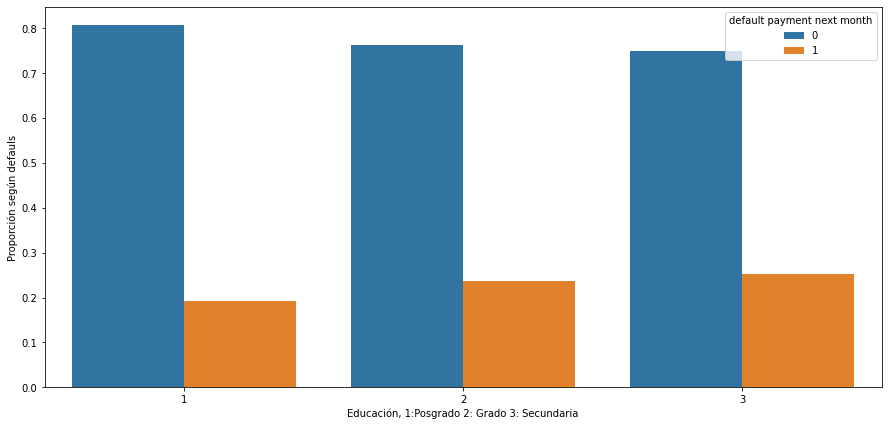

In [ ]:
df_education_default = proportion(df, "EDUCATION", 'default payment next month').reset_index()
df_education_default = df_education_default[['default payment next month', "EDUCATION", "proportion"]][1:7]

fig = plt.figure(figsize=(15, 7))
sns.barplot(y=df_education_default["proportion"],
                x=df_education_default["EDUCATION"],
                hue=df_education_default["default payment next month"],
                ci=None)
plt.xticks(rotation=0)
plt.ylabel("Proporción según defauls")
plt.xlabel("Educación, 1:Posgrado 2: Grado 3: Secundaria")
plt.ticklabel_format(style='plain', axis='y')

Las hombres se endeudan más que las mujeres, los casados más que los solteros, los que sólo tienen educación secundaria más que los que no.
Haciendo la intersección de estas 3 poblaciones:

In [ ]:
df_bad = df[df.SEX==1][df.MARRIAGE==1][df.EDUCATION==3]

len(df_bad), df_bad["default payment next month"].sum(), df_bad["default payment next month"].sum()/len(df_bad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1048, 303, 0.28912213740458015)

El 28,9% de los hombres casados con educación secundaria cae en default.

Variable Edad

In [ ]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

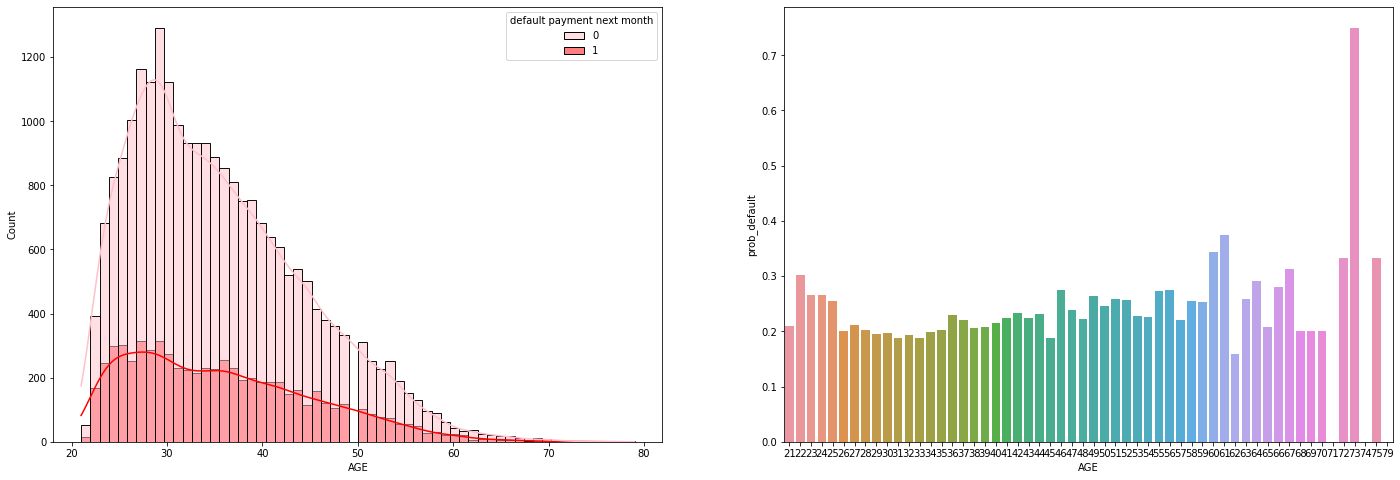

In [ ]:
x = prop_default("AGE")
fig, ax = plt.subplots(1,2, figsize=(24,8))#, sharex=True, sharey=True)
sns.histplot(data=df, x="AGE", hue ='default payment next month', bins=60,kde=True, palette=["pink", "red"] , ax=ax[0])
sns.barplot(y = x.prob_default, x= x.AGE, ci=None, ax=ax[1])  #'AGE', 'count_', 'total', 'prob_default'

In [ ]:
prop_default("AGE").prob_default.describe()

count    56.000000
mean      0.235577
std       0.098849
min       0.000000
25%       0.201075
50%       0.225618
75%       0.263782
max       0.750000
Name: prob_default, dtype: float64

La variable AGE tiene una media de 35 años, y mediana de 34 , además al ver el gráfico hay centralización. La proporción de defaulteadores por edad es muy pareja alrededor del 23%, de hecho los valores que se levantan un poco son en las edades con menos frecuencia (menores de 25 años, mayores de 60 años). Por lo cual la variable AGE es una de la que que se podría prescindir. 

In [ ]:
pd.crosstab(index = df['default payment next month'], columns =[df.SEX, df.EDUCATION] , values = df.SEX, aggfunc = 'count', )

SEX                           1                                            \
EDUCATION                     0       1       2       3     4     5     6   
default payment next month                                                  
0                           8.0  3448.0  3966.0  1445.0  38.0  89.0  21.0   
1                           NaN   906.0  1408.0   545.0   4.0   6.0   4.0   

SEX                           2                                             
EDUCATION                     0       1       2       3     4      5     6  
default payment next month                                                  
0                           6.0  5101.0  6734.0  2235.0  78.0  173.0  22.0  
1                           NaN  1130.0  1922.0   692.0   3.0   12.0   4.0

Segmentemos por SEX y EDUCATION, y veamos las proporciones de default.

In [ ]:
def two_uple(a,b):
  return (a, b)
df["(SEX, ED)"] = df.sort_values(by="EDUCATION")[["SEX", "EDUCATION"]].apply(lambda s: two_uple(*s), axis=1)

prop_default("(SEX, ED)").iloc[[1,2,3,8,9,10]]

,"(SEX, ED)",count_,total,prob_default
1,"(1, 1)",906,4354,0.208085
2,"(1, 2)",1408,5374,0.262002
3,"(1, 3)",545,1990,0.273869
8,"(2, 1)",1130,6231,0.181351
9,"(2, 2)",1922,8656,0.222043
10,"(2, 3)",692,2927,0.236420


En los 3 grupos de nivel educativo importantes, la probabilidad de default del hombre siempre es mayor a la de la mujer.

Variables de REPAYMENT STATUS

Para PAY_0, ..., PAY_6, donde los valores -2 y 0 no están en la descripción.

In [ ]:
for columna in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  print(columna, sorted(list(df[columna].unique())), df[columna].nunique(), sep="\t")

PAY_0	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]	11
PAY_2	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]	11
PAY_3	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]	11
PAY_4	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]	11
PAY_5	[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]	10
PAY_6	[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]	10


Hacemos un mapa de calor, de los valores de correlación entre las columnas del estado de pago. Elegimos el coeficiente de correlación de Spearman; pues son variables categóricas, y  nos interesa saber si las variables crecen juntas, más que si la relación es lineal. 

A medida que nos alejamos dela diagonal de la matriz, los valores disminuyen. Tiene sentido, que si uno se retrasa en el pago en un mes, es un poco más probable que lo haga en el mes siguiente. En cambio con 5 meses de distancia puede haber un poco más de independencia.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

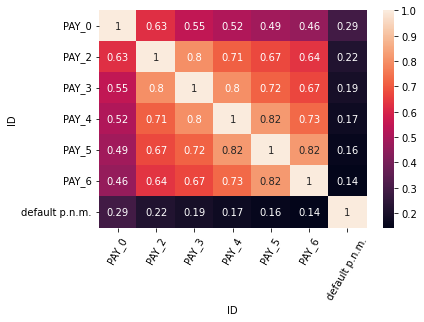

In [ ]:
df_pay = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', "default payment next month"]]

axis_labels = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', "default p.n.m."]

sns.heatmap(df_pay.corr(method='spearman'), annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
plt.xticks(rotation=60)

PAY_0 tiene en comparación no tan alta correlación con el resto. 
PAY_3 tiene correlación de 0.8 con PAY_2 y PAY_4.
PAY_5 tiene correlación de 0.8 con PAY_4 y PAY_6.

Se podrían dejar de lado 2 ó 3 de estas columnas, y por ejemplo quedarnos con PAY_0, PAY_2, PAY_3 y PAY_5. Aunque al ser variables categóricas con 10-11 valores, no se debe ahorrar demasiado costo computacional al correr modelos.

In [ ]:
#sns.pairplot(data=df.loc[:,"PAY_AMT1":"default payment next month"], hue="default payment next month")

## **VARIABLES NUMÉRICAS** 

### Variable LIMIT_BAL

In [ ]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Hacemos gráfico de distribución de las líneas de crédito. Cada bin es de aproximadamente \$5k. A modo deguía visual, hay 4 bines que resaltan en su entorno, son los de \$25k, \$200k, \$380k y \$500k.

(0.0, 1800.0)

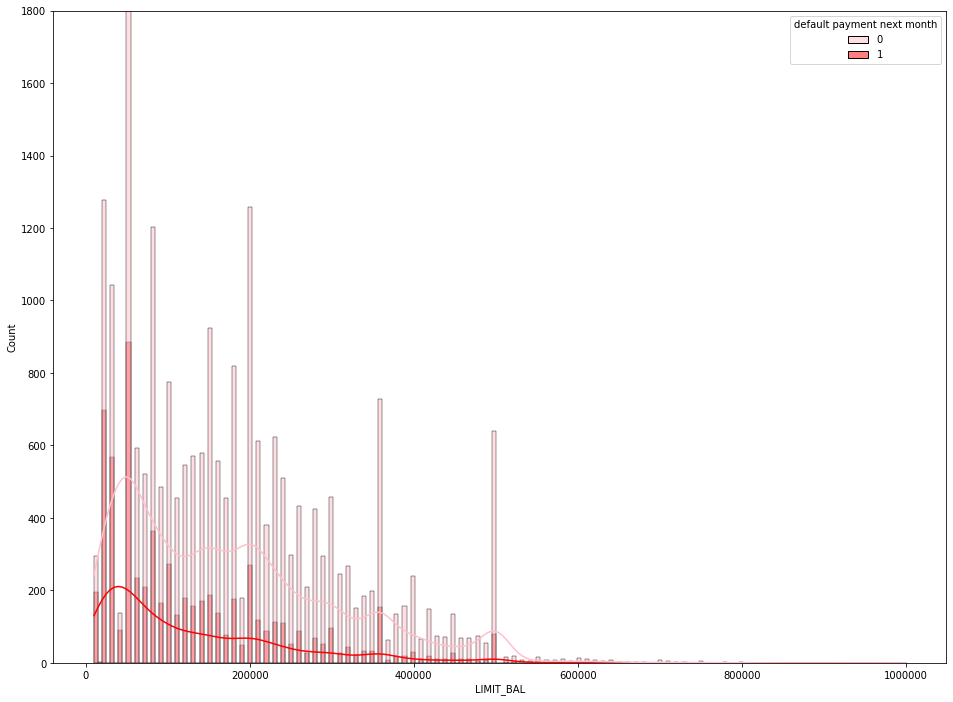

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.ticklabel_format(style="plain", axis="x")
x=sns.histplot(data=df, x="LIMIT_BAL", hue ='default payment next month', bins=int((df.LIMIT_BAL.max())/5000) ,kde=True, palette=["pink", "red"] )
x.set_ylim(top=1800)

### Variables de FACTURA y PAGO

In [ ]:
# Recordamos
numeric_cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
               ]

In [ ]:
df[numeric_cols].describe()

ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Las collumnas BILL_AMT tienen medias del orden de \$40k - \$50k, mientras que las PAY_AMT del orden de \$5k, por lo que se podría inferir que las BILL_AMT son la deuda total, no el vencimiento mensual.

En todos los casos, la desviación estándar es mayor a la media. Esto se debe deber a (quizás) una gran cantidad de 0s en estas columnas, sobre todo las de pago. También, a la existencia de varios valores extremos, como pagos superiores a \$300k ó 1 millón, cuando la media es de \$5k. Así, en el caso de las columnas de pago, las desviaciones estándar son muchísimo más grandes que la media.  

Miremos por ejemplo PAY_AMT2

In [ ]:
for i in [300, 100, 90, 80, 70, 60, 50, 30]:
  print("Valores de PAY_2 mayores a "+str(i)+"k :", df.PAY_AMT2.loc[df.PAY_AMT2 > 1000*i].count(), sep="\t")

Valores de PAY_2 mayores a 300k :	21
Valores de PAY_2 mayores a 100k :	196
Valores de PAY_2 mayores a 90k :	241
Valores de PAY_2 mayores a 80k :	282
Valores de PAY_2 mayores a 70k :	330
Valores de PAY_2 mayores a 60k :	390
Valores de PAY_2 mayores a 50k :	479
Valores de PAY_2 mayores a 30k :	841


In [ ]:
df.PAY_AMT2.loc[df.PAY_AMT2 < 70000].loc[df.PAY_AMT2 > 1000].describe()

count    21348.000000
mean      5882.072419
std       7812.581933
min       1001.000000
25%       2000.000000
50%       3120.000000
75%       6300.000000
max      69900.000000
Name: PAY_AMT2, dtype: float64

PAY_AMT2 teníamedia de 5k y desviación de 23k. Al quitar valores menores a 1k y mayores a 70k, la desviación baja sensiblemente.

Igualmente, estos comentarios son respecto a las estadísticas descriptivas. A la hora de correr modelos, también se debe predecir en caso de recibir valores extremos.

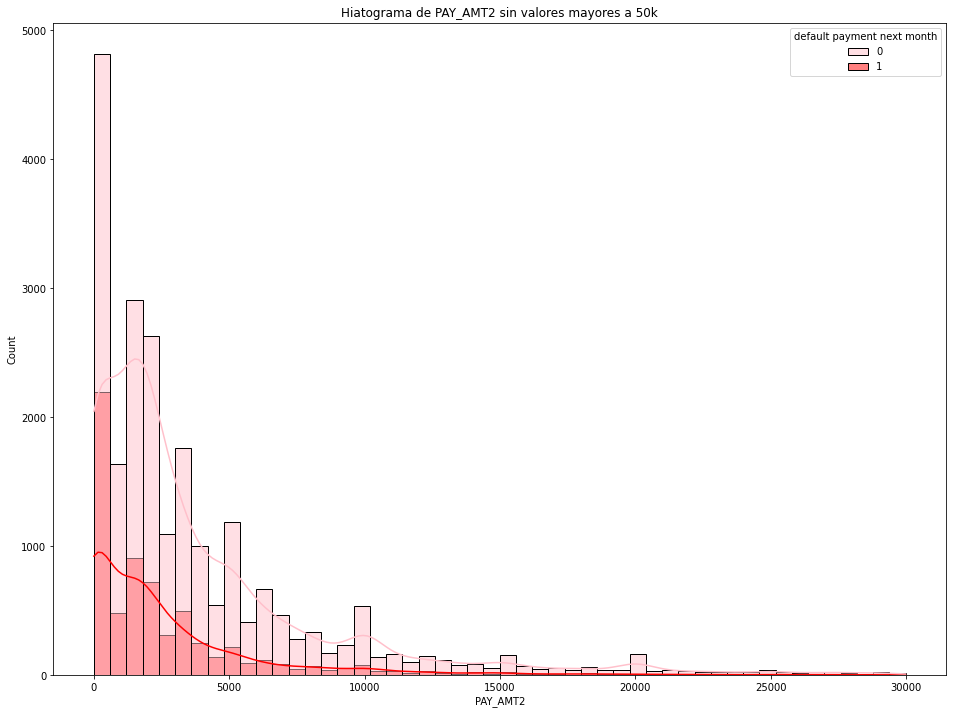

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.ticklabel_format(style="plain", axis="x")
plt.title("Hiatograma de PAY_AMT2 sin valores mayores a 50k")
x=sns.histplot(data=df[df.PAY_AMT2< 30000], x="PAY_AMT2", hue ='default payment next month', bins=50 ,kde=True, palette=["pink", "red"] )

Las variales BILL_AMT y PAY_AMT tienen entonces gran dispersión. Se creería que a mayor monto pagado un determinado mes (PAY_AMT), debería disminuir la deuda (BILL_AMT) del mes siguiente (no necesariamente de modo lineal, ya que hay otros facotres como intereses ó costos fijos de cuenta).

Los valores de BILL_AMT son influidos por los pagos, pero más importante aún por los gastos de un cliente.

Ambas categorías BILL y PAY son importantes. No deberían ser descartadas, sí se podría reducir dimensionalidad aplicando un método como PCA. A continuación aplicamos PCA para que queden 4 columnas en lugar de 12.

Sin embargo, aplicar PCA no necesariamente afecta de manera positiva la performance de un modelo, sólo reduce el costo de cómputo. 



In [ ]:
# Juntamos columnas de BILL y PAY
df_num = df[numeric_cols[1:]]

# Escalamos
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

# Aplicamos PCA de 4 componentes.
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_num)

In [ ]:
df_pca.shape

(30000, 4)

In [ ]:
print("Principal components")
print(pca.components_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 0.37902349  0.39045568  0.39540859  0.3985115   0.39525357  0.38720405
   0.1335579   0.11495493  0.12565996  0.11436203  0.11070841  0.10196094]
 [-0.18258456 -0.1589563  -0.10389235 -0.09817725 -0.08349282 -0.07262632
   0.42383842  0.45265325  0.42499851  0.37235938  0.31086195  0.32904921]
 [-0.05545341  0.01792365  0.05729852  0.08005663  0.04248477 -0.10112195
   0.3659371   0.30071724  0.23227009 -0.12237685 -0.76160098 -0.31871385]
 [-0.04191517 -0.07942846 -0.11827288 -0.02291544  0.11811414  0.14972794
  -0.20255    -0.16227365  0.26646902  0.60449266  0.07429751 -0.65708049]]
Explained variance ratio
[0.48143293 0.13581769 0.07574317 0.07359647]


# CONCLUSIONES

De las 23 variables (sin incluir el target):

LIMIT_BAL nos dice la línea de crédito abierta de una persona, tiene una buena distribución y variabilidad. 

SEX: un hombre tiene alrededor de 20% más de chances de endeudarse que una mujer

EDUCATION: A mayor nivel educativo, menor posibilidad de caer en default.

AGE: La proporción de default es muy pareja, se podría prescindir de esta variable.

MARRIAGE Una perosna casada tiene 12% más de posibilidades de caer en default que un soltero.

PAY_0, PAY_6 : En varias parejas hay mucha correlación. Como se menciono, se podrían dejar de lado PAY_4 y PAY_6.

BILL_AMTs y PAY_AMTs: Son 12 variables en total. Se podría aplicar PCA  para reducir dimensionalidad, o ver un poco más en detalle PAY_AMT5, PAY_AMT6, BILL_AMT5, BILL_AMT6, que son las más lejanas en el tiempo y menos podrían influir en el target. Hacer un análisis de correlaciones como se hizo con PAY_0, ..., PAY_6.
